In [2]:
#特徴量全使用+全ダミー化
#day+month循環数化
#特徴量16
#スコア：0.9380116

In [3]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [4]:
#データ読込
df=pd.read_csv("/content/bank_train.csv")

In [5]:
#dtype確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27128 non-null  int64 
 1   age        27128 non-null  int64 
 2   job        27128 non-null  object
 3   marital    27128 non-null  object
 4   education  27128 non-null  object
 5   default    27128 non-null  object
 6   balance    27128 non-null  int64 
 7   housing    27128 non-null  object
 8   loan       27128 non-null  object
 9   contact    27128 non-null  object
 10  day        27128 non-null  int64 
 11  month      27128 non-null  object
 12  duration   27128 non-null  int64 
 13  campaign   27128 non-null  int64 
 14  pdays      27128 non-null  int64 
 15  previous   27128 non-null  int64 
 16  poutcome   27128 non-null  object
 17  y          27128 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [6]:
#使用col
use_cols = ["id",
    "age",
    'job',
    'marital',
    'education',
    'default',
    "balance",
    "housing",
    "loan",
    "contact",
    "day",
    "month",
    "duration",
    "campaign",
    'pdays',
    'previous',
    "poutcome",
    "y"
]

In [7]:
df_use = df[use_cols]

In [8]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27128 non-null  int64 
 1   age        27128 non-null  int64 
 2   job        27128 non-null  object
 3   marital    27128 non-null  object
 4   education  27128 non-null  object
 5   default    27128 non-null  object
 6   balance    27128 non-null  int64 
 7   housing    27128 non-null  object
 8   loan       27128 non-null  object
 9   contact    27128 non-null  object
 10  day        27128 non-null  int64 
 11  month      27128 non-null  object
 12  duration   27128 non-null  int64 
 13  campaign   27128 non-null  int64 
 14  pdays      27128 non-null  int64 
 15  previous   27128 non-null  int64 
 16  poutcome   27128 non-null  object
 17  y          27128 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [9]:
def data_pre(df):
    #月+日の循環数化
    dic={"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
    df["month"]=df["month"].map(dic).astype(int)
    df["day"]=df["day"].astype(int)

    total_days_in_year = 365  # 仮定として、1年が365日とする
    month_day_number = (df["month"] - 1) * 31 + df["day"]  # 仮定として、1月から12月まで31日とする
    angle = (2 * np.pi * month_day_number) / total_days_in_year

    df["month_day_sin"] = np.sin(angle)
    df["month_day_cos"] = np.cos(angle)

    df = df.drop(columns=['month'], axis=1)
    df = df.drop(columns=['day'], axis=1)

    #IDカテゴリー化
    df["id"]=df["id"].astype("category")

    #job列のダミー変数化
    dummies_job=pd.get_dummies(df["job"], dtype=int,drop_first=True,prefix="job")
    df = pd.concat([df, dummies_job], axis=1)
    df.drop(columns=['job'], inplace=True)

    #marital列のダミー変数化
    dummies_marital=pd.get_dummies(df["marital"], dtype=int,drop_first=True,prefix="marital")
    df = pd.concat([df, dummies_marital], axis=1)
    df.drop(columns=['marital'], inplace=True)

    #education列のダミー変数化
    dummies_education=pd.get_dummies(df["education"], dtype=int,drop_first=True,prefix="education")
    df = pd.concat([df, dummies_education], axis=1)
    df.drop(columns=['education'], inplace=True)

    #default列のダミー変数化+置換
    dummies_default=pd.get_dummies(df["default"], dtype=int,drop_first=True,prefix="default")
    df = pd.concat([df, dummies_default], axis=1)
    df.drop(columns=['default'], inplace=True)

    #housing列のダミー変数化+置換
    dummies_housing=pd.get_dummies(df["housing"], dtype=int,drop_first=True,prefix="housing")
    df = pd.concat([df, dummies_housing], axis=1)
    df.drop(columns=['housing'], inplace=True)

    #loan列のダミー変数化
    dummies_loan=pd.get_dummies(df["loan"], dtype=int,drop_first=True,prefix="loan")
    df = pd.concat([df, dummies_loan], axis=1)
    df.drop(columns=['loan'], inplace=True)

    #contact列のダミー変数化+置換
    dummies_contact=pd.get_dummies(df["contact"], dtype=int,drop_first=True,prefix="contact")
    df = pd.concat([df, dummies_contact], axis=1)
    df.drop(columns=['contact'], inplace=True)

    #poutcome列のダミー変数化+置換
    dummies_poutcome=pd.get_dummies(df["poutcome"], dtype=int,drop_first=True,prefix="poutcome")
    df = pd.concat([df, dummies_poutcome], axis=1)
    df.drop(columns=['poutcome'], inplace=True)



    return df


df_use=data_pre(df_use)

In [10]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   27128 non-null  category
 1   age                  27128 non-null  int64   
 2   balance              27128 non-null  int64   
 3   duration             27128 non-null  int64   
 4   campaign             27128 non-null  int64   
 5   pdays                27128 non-null  int64   
 6   previous             27128 non-null  int64   
 7   y                    27128 non-null  int64   
 8   month_day_sin        27128 non-null  float64 
 9   month_day_cos        27128 non-null  float64 
 10  job_blue-collar      27128 non-null  int64   
 11  job_entrepreneur     27128 non-null  int64   
 12  job_housemaid        27128 non-null  int64   
 13  job_management       27128 non-null  int64   
 14  job_retired          27128 non-null  int64   
 15  job_self-employed  

In [11]:
!pip install optuna lightgbm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler

import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


df_train,df_val =train_test_split(df_use,test_size=0.2,random_state=42)

col = "y"
train_y = df_train[col]
train_x = df_train.drop(col,axis=1)

val_y = df_val[col]
val_x =df_val.drop(col,axis=1)

trains = lgb.Dataset(train_x,train_y)
valids = lgb.Dataset(val_x,val_y)

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'max_depth': trial.suggest_int('max_depth', -1, 50),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'early_stopping_rounds': 100,
        }

    trains = lgb.Dataset(train_x, train_y)
    valids = lgb.Dataset(val_x, val_y)

    model = lgb.train(
        params,
        trains,
        valid_sets=[trains, valids],
        num_boost_round=1000,
    )

    pred_y = model.predict(val_x, num_iteration=model.best_iteration)
    auc = roc_auc_score(val_y, pred_y)

    return auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
[I 2024-08-05 03:06:24,320] A new study created in memory with name: no-name-e41fcff3-1374-4d11-b652-01a24d55c04d
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.s

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.105088	valid_1's binary_logloss: 0.183044


[I 2024-08-05 03:06:33,673] Trial 0 finished with value: 0.942732243119521 and parameters: {'num_leaves': 100, 'learning_rate': 0.012426830775003237, 'feature_fraction': 0.6469229700848355, 'bagging_fraction': 0.7243121783401125, 'bagging_freq': 9, 'max_depth': 32, 'min_data_in_leaf': 20, 'lambda_l1': 1.2248144200746647e-07, 'lambda_l2': 0.016971035233905234}. Best is trial 0 with value: 0.942732243119521.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.309736	valid_1's binary_logloss: 0.306378


[I 2024-08-05 03:06:47,928] Trial 1 finished with value: 0.9393240892528617 and parameters: {'num_leaves': 104, 'learning_rate': 0.0002046421192048622, 'feature_fraction': 0.7281304574540626, 'bagging_fraction': 0.7120930530040824, 'bagging_freq': 2, 'max_depth': 46, 'min_data_in_leaf': 10, 'lambda_l1': 0.005504659009770591, 'lambda_l2': 0.09394606491731285}. Best is trial 0 with value: 0.942732243119521.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2024-08-05 03:06:59,469] Trial 2 finished with value: 0.9323782457654591 and parameters: {'num_leaves': 125, 'learning_rate': 0.0009497362620437498, 'feature_fraction': 0.9602294328305125, 'bagging_fraction': 0.7963353011452936, 'bagging_freq': 7, 'max_depth': 7, 'min_data_in_leaf': 41, 'lambda_l1': 6.112822166913185e-06, 'lambda_l2': 0.02074459978293533}. Best is trial 0 with value: 0.942732243119521.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2024-08-05 03:07:06,193] Trial 3 finished with value: 0.9431211912653359 and parameters: {'num_leaves': 100, 'learning_rate': 0.012940209818246033, 'feature_fraction': 0.7264675761266286, 'bagging_fraction': 0.9990706002370783, 'bagging_freq': 2, 'max_depth': 27, 'min_data_in_leaf': 78, 'lambda_l1': 1.1228390981048813e-06, 'lambda_l2': 0.8921571611485506}. Best is trial 3 with value: 0.9431211912653359.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2024-08-05 03:07:20,249] Trial 4 finished with value: 0.9387435645444279 and parameters: {'num_leaves': 147, 'learning_rate': 0.0008754234060804514, 'feature_fraction': 0.9388120587896207, 'bagging_fraction': 0.5878293234951144, 'bagging_freq': 6, 'max_depth': 8, 'min_data_in_leaf': 2, 'lambda_l1': 0.00012340174106519064, 'lambda_l2': 0.00014081789027702403}. Best is trial 3 with value: 0.9431211912653359.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds


[I 2024-08-05 03:07:23,235] Trial 5 finished with value: 0.9420644522188621 and parameters: {'num_leaves': 31, 'learning_rate': 0.0721703269636176, 'feature_fraction': 0.7103735604824585, 'bagging_fraction': 0.6965630478618154, 'bagging_freq': 9, 'max_depth': 15, 'min_data_in_leaf': 40, 'lambda_l1': 2.747851585824472, 'lambda_l2': 0.13688736646126248}. Best is trial 3 with value: 0.9431211912653359.


Early stopping, best iteration is:
[151]	training's binary_logloss: 0.157694	valid_1's binary_logloss: 0.18361


<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
<ipython-input-11-1c7fef589431>:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
<ipython-input-11-1c7fef589431>:36: FutureWarning: suggest_loguniform has been deprecated

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.198384	valid_1's binary_logloss: 0.208432


[I 2024-08-05 03:07:34,445] Trial 6 finished with value: 0.9406514898486579 and parameters: {'num_leaves': 98, 'learning_rate': 0.0015277874646637405, 'feature_fraction': 0.8574033843031907, 'bagging_fraction': 0.9510483945333812, 'bagging_freq': 8, 'max_depth': 19, 'min_data_in_leaf': 73, 'lambda_l1': 1.5903650003434693e-07, 'lambda_l2': 0.0019354064505723418}. Best is trial 3 with value: 0.9431211912653359.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2024-08-05 03:07:48,431] Trial 7 finished with value: 0.9407547775683617 and parameters: {'num_leaves': 130, 'learning_rate': 0.0017822244136811336, 'feature_fraction': 0.5463980662368682, 'bagging_fraction': 0.9266522180572246, 'bagging_freq': 6, 'max_depth': 44, 'min_data_in_leaf': 44, 'lambda_l1': 2.3517106823298507e-08, 'lambda_l2': 0.09468631590833372}. Best is trial 3 with value: 0.9431211912653359.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030742 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.163442	valid_1's binary_logloss: 0.184442


[I 2024-08-05 03:07:57,995] Trial 8 finished with value: 0.9432892468620816 and parameters: {'num_leaves': 52, 'learning_rate': 0.004927797626870207, 'feature_fraction': 0.6892522112679039, 'bagging_fraction': 0.5192567767264585, 'bagging_freq': 5, 'max_depth': 45, 'min_data_in_leaf': 70, 'lambda_l1': 0.15544201027452378, 'lambda_l2': 1.690563122866854e-08}. Best is trial 8 with value: 0.9432892468620816.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.315963	valid_1's binary_logloss: 0.308757


[I 2024-08-05 03:08:08,591] Trial 9 finished with value: 0.935348364253177 and parameters: {'num_leaves': 59, 'learning_rate': 0.0002559677375591049, 'feature_fraction': 0.510275169507044, 'bagging_fraction': 0.6570685999164554, 'bagging_freq': 2, 'max_depth': 0, 'min_data_in_leaf': 15, 'lambda_l1': 0.18745366754803716, 'lambda_l2': 1.292241888331805}. Best is trial 8 with value: 0.9432892468620816.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fracti

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2024-08-05 03:08:14,011] Trial 10 finished with value: 0.9420736560750734 and parameters: {'num_leaves': 60, 'learning_rate': 0.009459490519936541, 'feature_fraction': 0.8488709435066835, 'bagging_fraction': 0.5224208095713201, 'bagging_freq': 4, 'max_depth': 36, 'min_data_in_leaf': 100, 'lambda_l1': 0.023705157113568076, 'lambda_l2': 3.5159959483187895e-08}. Best is trial 8 with value: 0.9432892468620816.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.129444	valid_1's binary_logloss: 0.181232


[I 2024-08-05 03:08:25,240] Trial 11 finished with value: 0.9436764905900797 and parameters: {'num_leaves': 72, 'learning_rate': 0.008790789992597279, 'feature_fraction': 0.6289032471653004, 'bagging_fraction': 0.8244613480922657, 'bagging_freq': 4, 'max_depth': 30, 'min_data_in_leaf': 73, 'lambda_l1': 4.9159365760648556e-05, 'lambda_l2': 1.0602251565894118e-08}. Best is trial 11 with value: 0.9436764905900797.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('fe

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds


[I 2024-08-05 03:08:27,622] Trial 12 finished with value: 0.9420327500474681 and parameters: {'num_leaves': 63, 'learning_rate': 0.050342732240254234, 'feature_fraction': 0.6213696430575728, 'bagging_fraction': 0.8089221779138155, 'bagging_freq': 4, 'max_depth': 39, 'min_data_in_leaf': 69, 'lambda_l1': 0.0001716795606721521, 'lambda_l2': 1.0642219788757208e-08}. Best is trial 11 with value: 0.9436764905900797.


Early stopping, best iteration is:
[178]	training's binary_logloss: 0.124908	valid_1's binary_logloss: 0.183364


<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
<ipython-input-11-1c7fef589431>:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
<ipython-input-11-1c7fef589431>:36: FutureWarning: suggest_loguniform has been deprecated

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2024-08-05 03:08:37,121] Trial 13 finished with value: 0.9421854658838617 and parameters: {'num_leaves': 33, 'learning_rate': 0.0043177523634483446, 'feature_fraction': 0.6300242208316258, 'bagging_fraction': 0.8568511025455815, 'bagging_freq': 4, 'max_depth': 50, 'min_data_in_leaf': 60, 'lambda_l1': 4.972053940663735, 'lambda_l2': 3.8131252540232743e-07}. Best is trial 11 with value: 0.9436764905900797.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-08-05 03:08:40,072] Trial 14 finished with value: 0.9422642099870021 and parameters: {'num_leaves': 74, 'learning_rate': 0.026101373840659053, 'feature_fraction': 0.8269492248260458, 'bagging_fraction': 0.6005795420644561, 'bagging_freq': 5, 'max_depth': 26, 'min_data_in_leaf': 91, 'lambda_l1': 0.002570259384492019, 'lambda_l2': 2.1616836246353034e-06}. Best is trial 11 with value: 0.9436764905900797.


Early stopping, best iteration is:
[230]	training's binary_logloss: 0.144409	valid_1's binary_logloss: 0.1831


<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
<ipython-input-11-1c7fef589431>:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
<ipython-input-11-1c7fef589431>:36: FutureWarning: suggest_loguniform has been deprecated

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.167502	valid_1's binary_logloss: 0.185449


[I 2024-08-05 03:08:49,039] Trial 15 finished with value: 0.9436925121175584 and parameters: {'num_leaves': 46, 'learning_rate': 0.0042697089670146095, 'feature_fraction': 0.6655013005881756, 'bagging_fraction': 0.8646925014829165, 'bagging_freq': 1, 'max_depth': 40, 'min_data_in_leaf': 57, 'lambda_l1': 1.7385556014827513e-05, 'lambda_l2': 1.5347407317886373e-05}. Best is trial 15 with value: 0.9436925121175584.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('f

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.13437	valid_1's binary_logloss: 0.181333


[I 2024-08-05 03:08:51,856] Trial 16 finished with value: 0.9437784147755298 and parameters: {'num_leaves': 44, 'learning_rate': 0.02508197420700377, 'feature_fraction': 0.5736953455380975, 'bagging_fraction': 0.869137098621006, 'bagging_freq': 1, 'max_depth': 32, 'min_data_in_leaf': 29, 'lambda_l1': 3.6759569027797434e-05, 'lambda_l2': 2.42484941182842e-05}. Best is trial 16 with value: 0.9437784147755298.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.148729	valid_1's binary_logloss: 0.1825


[I 2024-08-05 03:08:54,349] Trial 17 finished with value: 0.9430727857993362 and parameters: {'num_leaves': 21, 'learning_rate': 0.03435894789154171, 'feature_fraction': 0.5818276282537932, 'bagging_fraction': 0.8939290578734332, 'bagging_freq': 1, 'max_depth': 38, 'min_data_in_leaf': 26, 'lambda_l1': 6.398304828961122e-06, 'lambda_l2': 2.88157981550524e-05}. Best is trial 16 with value: 0.9437784147755298.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds


[I 2024-08-05 03:08:57,879] Trial 18 finished with value: 0.9423052864563891 and parameters: {'num_leaves': 43, 'learning_rate': 0.0922103636939768, 'feature_fraction': 0.7870121739875959, 'bagging_fraction': 0.891711993483365, 'bagging_freq': 1, 'max_depth': 20, 'min_data_in_leaf': 32, 'lambda_l1': 1.5944304922570502e-05, 'lambda_l2': 8.247497788884029e-06}. Best is trial 16 with value: 0.9437784147755298.


Early stopping, best iteration is:
[57]	training's binary_logloss: 0.156489	valid_1's binary_logloss: 0.183612
[LightGBM] [Info] Number of positive: 2565, number of negative: 19137


<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
<ipython-input-11-1c7fef589431>:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
<ipython-input-11-1c7fef589431>:36: FutureWarning: suggest_loguniform has been deprecated

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.138553	valid_1's binary_logloss: 0.182707


[I 2024-08-05 03:09:01,554] Trial 19 finished with value: 0.9426916779754788 and parameters: {'num_leaves': 44, 'learning_rate': 0.022689266648936855, 'feature_fraction': 0.5609416103264628, 'bagging_fraction': 0.768994790452647, 'bagging_freq': 3, 'max_depth': 34, 'min_data_in_leaf': 54, 'lambda_l1': 0.0007546158508719107, 'lambda_l2': 0.0002339179775469935}. Best is trial 16 with value: 0.9437784147755298.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.187704	valid_1's binary_logloss: 0.20409


[I 2024-08-05 03:09:11,841] Trial 20 finished with value: 0.9417774282584974 and parameters: {'num_leaves': 77, 'learning_rate': 0.0024798383901655707, 'feature_fraction': 0.5152857039270776, 'bagging_fraction': 0.9902974550979624, 'bagging_freq': 1, 'max_depth': 41, 'min_data_in_leaf': 59, 'lambda_l1': 4.505922626715593e-07, 'lambda_l2': 1.7694631694490708e-07}. Best is trial 16 with value: 0.9437784147755298.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('fe

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[988]	training's binary_logloss: 0.137723	valid_1's binary_logloss: 0.182499


[I 2024-08-05 03:09:21,204] Trial 21 finished with value: 0.9431972082999694 and parameters: {'num_leaves': 74, 'learning_rate': 0.006696333260242231, 'feature_fraction': 0.6007710966318273, 'bagging_fraction': 0.8354987645515789, 'bagging_freq': 3, 'max_depth': 31, 'min_data_in_leaf': 84, 'lambda_l1': 4.8506267480910637e-05, 'lambda_l2': 2.1124832417191765e-06}. Best is trial 16 with value: 0.9437784147755298.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('fe

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.131022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.122695	valid_1's binary_logloss: 0.183045


[I 2024-08-05 03:09:30,367] Trial 22 finished with value: 0.9422846630008047 and parameters: {'num_leaves': 85, 'learning_rate': 0.013226189705722525, 'feature_fraction': 0.6675184148073922, 'bagging_fraction': 0.8692797391842672, 'bagging_freq': 3, 'max_depth': 29, 'min_data_in_leaf': 49, 'lambda_l1': 2.6731625142408507e-06, 'lambda_l2': 0.0009378155004188882}. Best is trial 16 with value: 0.9437784147755298.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('fea

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds


[I 2024-08-05 03:09:32,823] Trial 23 finished with value: 0.9428962081135059 and parameters: {'num_leaves': 46, 'learning_rate': 0.021289558480501725, 'feature_fraction': 0.7636908171297223, 'bagging_fraction': 0.8190330033864768, 'bagging_freq': 1, 'max_depth': 22, 'min_data_in_leaf': 34, 'lambda_l1': 3.5841039432682046e-05, 'lambda_l2': 3.381131439160291e-05}. Best is trial 16 with value: 0.9437784147755298.


Early stopping, best iteration is:
[309]	training's binary_logloss: 0.145364	valid_1's binary_logloss: 0.182387


<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
<ipython-input-11-1c7fef589431>:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
<ipython-input-11-1c7fef589431>:36: FutureWarning: suggest_loguniform has been deprecated

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.187388	valid_1's binary_logloss: 0.192751


[I 2024-08-05 03:09:42,293] Trial 24 finished with value: 0.9425294173993107 and parameters: {'num_leaves': 33, 'learning_rate': 0.0031903414751260147, 'feature_fraction': 0.6593693916596546, 'bagging_fraction': 0.7708228927560534, 'bagging_freq': 2, 'max_depth': 36, 'min_data_in_leaf': 63, 'lambda_l1': 0.0003327843862625344, 'lambda_l2': 1.9515575229744102e-07}. Best is trial 16 with value: 0.9437784147755298.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('fe

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.1735	valid_1's binary_logloss: 0.183507


[I 2024-08-05 03:09:48,219] Trial 25 finished with value: 0.9437508032068964 and parameters: {'num_leaves': 20, 'learning_rate': 0.007491692094442032, 'feature_fraction': 0.5791572663793162, 'bagging_fraction': 0.9098042781544052, 'bagging_freq': 3, 'max_depth': 24, 'min_data_in_leaf': 48, 'lambda_l1': 0.0010017804408755354, 'lambda_l2': 2.3479752689766246e-06}. Best is trial 16 with value: 0.9437784147755298.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('fea

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.161446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.301639	valid_1's binary_logloss: 0.293695


[I 2024-08-05 03:09:56,520] Trial 26 finished with value: 0.9320325898321932 and parameters: {'num_leaves': 21, 'learning_rate': 0.0003888436947823787, 'feature_fraction': 0.5520435319461853, 'bagging_fraction': 0.9354560393445822, 'bagging_freq': 2, 'max_depth': 15, 'min_data_in_leaf': 50, 'lambda_l1': 0.0024356569749960796, 'lambda_l2': 2.82549727411706e-06}. Best is trial 16 with value: 0.9437784147755298.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.16873	valid_1's binary_logloss: 0.184357


[I 2024-08-05 03:10:05,895] Trial 27 finished with value: 0.9439965802560922 and parameters: {'num_leaves': 31, 'learning_rate': 0.005644448248067154, 'feature_fraction': 0.5903419492079807, 'bagging_fraction': 0.9072212891450792, 'bagging_freq': 3, 'max_depth': 24, 'min_data_in_leaf': 32, 'lambda_l1': 0.013614738390298173, 'lambda_l2': 2.92489718481914e-05}. Best is trial 27 with value: 0.9439965802560922.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds


[I 2024-08-05 03:10:07,533] Trial 28 finished with value: 0.9436652414324881 and parameters: {'num_leaves': 30, 'learning_rate': 0.048157542644863015, 'feature_fraction': 0.5929509640915704, 'bagging_fraction': 0.9647303940965504, 'bagging_freq': 3, 'max_depth': 16, 'min_data_in_leaf': 26, 'lambda_l1': 0.02484242283454562, 'lambda_l2': 5.4214634499012555e-05}. Best is trial 27 with value: 0.9439965802560922.


Early stopping, best iteration is:
[153]	training's binary_logloss: 0.15935	valid_1's binary_logloss: 0.182134


<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
<ipython-input-11-1c7fef589431>:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
<ipython-input-11-1c7fef589431>:36: FutureWarning: suggest_loguniform has been deprecated

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.157447	valid_1's binary_logloss: 0.182537


[I 2024-08-05 03:10:11,861] Trial 29 finished with value: 0.9436335392610941 and parameters: {'num_leaves': 20, 'learning_rate': 0.017414768249114736, 'feature_fraction': 0.5060004862563481, 'bagging_fraction': 0.9024532974214643, 'bagging_freq': 5, 'max_depth': 23, 'min_data_in_leaf': 23, 'lambda_l1': 0.027710348315805263, 'lambda_l2': 0.004656170541110028}. Best is trial 27 with value: 0.9439965802560922.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.154604	valid_1's binary_logloss: 0.182254


[I 2024-08-05 03:10:21,532] Trial 30 finished with value: 0.9441840662159504 and parameters: {'num_leaves': 37, 'learning_rate': 0.007462947963793709, 'feature_fraction': 0.5461970786626393, 'bagging_fraction': 0.9140116472472739, 'bagging_freq': 3, 'max_depth': 25, 'min_data_in_leaf': 33, 'lambda_l1': 0.20277757308547092, 'lambda_l2': 5.528482843016522e-07}. Best is trial 30 with value: 0.9441840662159504.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.16299	valid_1's binary_logloss: 0.182965


[I 2024-08-05 03:10:30,915] Trial 31 finished with value: 0.9442607650177107 and parameters: {'num_leaves': 33, 'learning_rate': 0.006890325830112646, 'feature_fraction': 0.5388754082072468, 'bagging_fraction': 0.9141818459828606, 'bagging_freq': 3, 'max_depth': 25, 'min_data_in_leaf': 34, 'lambda_l1': 0.6373080479423018, 'lambda_l2': 5.296983344070414e-07}. Best is trial 31 with value: 0.9442607650177107.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.167417	valid_1's binary_logloss: 0.184686


[I 2024-08-05 03:10:38,174] Trial 32 finished with value: 0.9440988453251057 and parameters: {'num_leaves': 37, 'learning_rate': 0.005573231242951178, 'feature_fraction': 0.532504847965958, 'bagging_fraction': 0.96491145676926, 'bagging_freq': 2, 'max_depth': 33, 'min_data_in_leaf': 34, 'lambda_l1': 0.6707148849215541, 'lambda_l2': 6.915035781180169e-08}. Best is trial 31 with value: 0.9442607650177107.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fr

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.199636	valid_1's binary_logloss: 0.20362


[I 2024-08-05 03:10:47,757] Trial 33 finished with value: 0.9422676188226359 and parameters: {'num_leaves': 36, 'learning_rate': 0.0025475842611308486, 'feature_fraction': 0.5389678851051312, 'bagging_fraction': 0.9646375733167682, 'bagging_freq': 10, 'max_depth': 28, 'min_data_in_leaf': 18, 'lambda_l1': 1.1803903268987428, 'lambda_l2': 6.152431746512406e-08}. Best is trial 31 with value: 0.9442607650177107.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.154194	valid_1's binary_logloss: 0.183937


[I 2024-08-05 03:10:58,578] Trial 34 finished with value: 0.9438932925363885 and parameters: {'num_leaves': 54, 'learning_rate': 0.005776204142225953, 'feature_fraction': 0.5320419362523252, 'bagging_fraction': 0.9759404018774757, 'bagging_freq': 2, 'max_depth': 19, 'min_data_in_leaf': 39, 'lambda_l1': 0.580603260126271, 'lambda_l2': 9.754695294185496e-07}. Best is trial 31 with value: 0.9442607650177107.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2024-08-05 03:11:05,931] Trial 35 finished with value: 0.9338598961736841 and parameters: {'num_leaves': 38, 'learning_rate': 0.0007743313561426654, 'feature_fraction': 0.6142563595905168, 'bagging_fraction': 0.9343613013371506, 'bagging_freq': 4, 'max_depth': 12, 'min_data_in_leaf': 8, 'lambda_l1': 9.585239500184079, 'lambda_l2': 4.6621161532146883e-07}. Best is trial 31 with value: 0.9442607650177107.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.160008	valid_1's binary_logloss: 0.18186


[I 2024-08-05 03:11:13,566] Trial 36 finished with value: 0.9440940729552184 and parameters: {'num_leaves': 27, 'learning_rate': 0.012063887052271759, 'feature_fraction': 0.5351190909358307, 'bagging_fraction': 0.9943282057442673, 'bagging_freq': 3, 'max_depth': 26, 'min_data_in_leaf': 35, 'lambda_l1': 0.22641202457903595, 'lambda_l2': 8.661641318060168e-08}. Best is trial 31 with value: 0.9442607650177107.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.155573	valid_1's binary_logloss: 0.181833


[I 2024-08-05 03:11:19,212] Trial 37 finished with value: 0.9440245327082892 and parameters: {'num_leaves': 28, 'learning_rate': 0.012276944533184791, 'feature_fraction': 0.5001609486155041, 'bagging_fraction': 0.9975622178042307, 'bagging_freq': 7, 'max_depth': 26, 'min_data_in_leaf': 38, 'lambda_l1': 0.12901727473026872, 'lambda_l2': 1.3018703659211928e-07}. Best is trial 31 with value: 0.9442607650177107.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.225499	valid_1's binary_logloss: 0.224965


[I 2024-08-05 03:11:29,903] Trial 38 finished with value: 0.933039389436632 and parameters: {'num_leaves': 53, 'learning_rate': 0.0012642932890788525, 'feature_fraction': 0.9029799990837701, 'bagging_fraction': 0.9507054352676008, 'bagging_freq': 2, 'max_depth': 33, 'min_data_in_leaf': 14, 'lambda_l1': 0.5436437734938754, 'lambda_l2': 9.350583831200046}. Best is trial 31 with value: 0.9442607650177107.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fra

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.

[I 2024-08-05 03:11:39,550] Trial 39 finished with value: 0.9429623395248014 and parameters: {'num_leaves': 110, 'learning_rate': 0.013221969564976153, 'feature_fraction': 0.5418503828569046, 'bagging_fraction': 0.9972069642020152, 'bagging_freq': 6, 'max_depth': 28, 'min_data_in_leaf': 43, 'lambda_l1': 0.07007478729395021, 'lambda_l2': 5.513948242865739e-08}. Best is trial 31 with value: 0.9442607650177107.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2024-08-05 03:11:49,622] Trial 40 finished with value: 0.9330634217278501 and parameters: {'num_leaves': 39, 'learning_rate': 0.0001307858546863934, 'feature_fraction': 0.565022431434375, 'bagging_fraction': 0.9309604816334287, 'bagging_freq': 2, 'max_depth': 9, 'min_data_in_leaf': 21, 'lambda_l1': 2.1147768510455354, 'lambda_l2': 6.765250160773812e-06}. Best is trial 31 with value: 0.9442607650177107.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.1512	valid_1's binary_logloss: 0.181631


[I 2024-08-05 03:11:55,599] Trial 41 finished with value: 0.9438615903649943 and parameters: {'num_leaves': 27, 'learning_rate': 0.011768977947651567, 'feature_fraction': 0.5219208494785941, 'bagging_fraction': 0.9996427009297363, 'bagging_freq': 7, 'max_depth': 21, 'min_data_in_leaf': 38, 'lambda_l1': 0.1834768714582151, 'lambda_l2': 1.3141248969566547e-07}. Best is trial 31 with value: 0.9442607650177107.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.193189	valid_1's binary_logloss: 0.19698


[I 2024-08-05 03:12:04,639] Trial 42 finished with value: 0.94252430414586 and parameters: {'num_leaves': 28, 'learning_rate': 0.003428034813477141, 'feature_fraction': 0.5011699052887237, 'bagging_fraction': 0.9675788578586481, 'bagging_freq': 8, 'max_depth': 25, 'min_data_in_leaf': 37, 'lambda_l1': 0.41268616100059263, 'lambda_l2': 6.253859304409735e-07}. Best is trial 31 with value: 0.9442607650177107.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[959]	training's binary_logloss: 0.155553	valid_1's binary_logloss: 0.181883


[I 2024-08-05 03:12:10,366] Trial 43 finished with value: 0.9430366521416181 and parameters: {'num_leaves': 26, 'learning_rate': 0.009419745776674662, 'feature_fraction': 0.996205203007609, 'bagging_fraction': 0.9516938225551378, 'bagging_freq': 7, 'max_depth': 18, 'min_data_in_leaf': 44, 'lambda_l1': 0.09929549525406074, 'lambda_l2': 2.7413461146537292e-08}. Best is trial 31 with value: 0.9442607650177107.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.153067	valid_1's binary_logloss: 0.181854


[I 2024-08-05 03:12:18,625] Trial 44 finished with value: 0.9442968986754287 and parameters: {'num_leaves': 38, 'learning_rate': 0.01682666747495707, 'feature_fraction': 0.5304074571085343, 'bagging_fraction': 0.7214533469491555, 'bagging_freq': 8, 'max_depth': 27, 'min_data_in_leaf': 27, 'lambda_l1': 1.3501245931760109, 'lambda_l2': 9.525135887455441e-08}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.123751	valid_1's binary_logloss: 0.182209


[I 2024-08-05 03:12:26,831] Trial 45 finished with value: 0.9438909063514449 and parameters: {'num_leaves': 66, 'learning_rate': 0.0171085918687061, 'feature_fraction': 0.5316874958732848, 'bagging_fraction': 0.722197854576553, 'bagging_freq': 10, 'max_depth': 31, 'min_data_in_leaf': 3, 'lambda_l1': 1.4740375581884053, 'lambda_l2': 5.9161863020261144e-08}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_f

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2024-08-05 03:12:35,505] Trial 46 finished with value: 0.939063313326877 and parameters: {'num_leaves': 50, 'learning_rate': 0.0020244198011882294, 'feature_fraction': 0.6975930937154872, 'bagging_fraction': 0.6801580653064307, 'bagging_freq': 8, 'max_depth': 35, 'min_data_in_leaf': 24, 'lambda_l1': 5.174580266001506, 'lambda_l2': 8.292377061544296e-07}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2024-08-05 03:12:48,103] Trial 47 finished with value: 0.9420682019380593 and parameters: {'num_leaves': 143, 'learning_rate': 0.008160898760726948, 'feature_fraction': 0.6400159613261486, 'bagging_fraction': 0.6232800698029711, 'bagging_freq': 9, 'max_depth': -1, 'min_data_in_leaf': 29, 'lambda_l1': 0.37106419834076887, 'lambda_l2': 2.851390263043318e-07}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds


[I 2024-08-05 03:12:50,434] Trial 48 finished with value: 0.9436413795830517 and parameters: {'num_leaves': 39, 'learning_rate': 0.03433778776841993, 'feature_fraction': 0.6058496109140478, 'bagging_fraction': 0.7448334085150278, 'bagging_freq': 4, 'max_depth': 27, 'min_data_in_leaf': 19, 'lambda_l1': 0.0586815057763676, 'lambda_l2': 2.0691989917642018e-08}. Best is trial 44 with value: 0.9442968986754287.


Early stopping, best iteration is:
[251]	training's binary_logloss: 0.141931	valid_1's binary_logloss: 0.182139


<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
<ipython-input-11-1c7fef589431>:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
<ipython-input-11-1c7fef589431>:36: FutureWarning: suggest_loguniform has been deprecated

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.

[I 2024-08-05 03:12:56,279] Trial 49 finished with value: 0.9425594151528881 and parameters: {'num_leaves': 110, 'learning_rate': 0.03633186351668094, 'feature_fraction': 0.5580888838760238, 'bagging_fraction': 0.6719425906846325, 'bagging_freq': 5, 'max_depth': 30, 'min_data_in_leaf': 12, 'lambda_l1': 0.9381446239128722, 'lambda_l2': 7.829296126072058e-08}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.157667	valid_1's binary_logloss: 0.186369


[I 2024-08-05 03:13:03,788] Trial 50 finished with value: 0.9439866946327543 and parameters: {'num_leaves': 57, 'learning_rate': 0.004750255326116144, 'feature_fraction': 0.5315464943782006, 'bagging_fraction': 0.710081651220986, 'bagging_freq': 3, 'max_depth': 22, 'min_data_in_leaf': 30, 'lambda_l1': 0.007407791680481611, 'lambda_l2': 2.735058017558837e-08}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[947]	training's binary_logloss: 0.154396	valid_1's binary_logloss: 0.181524


[I 2024-08-05 03:13:12,489] Trial 51 finished with value: 0.9441104353662605 and parameters: {'num_leaves': 26, 'learning_rate': 0.011645482397348155, 'feature_fraction': 0.505208342023181, 'bagging_fraction': 0.9800615886993833, 'bagging_freq': 7, 'max_depth': 26, 'min_data_in_leaf': 35, 'lambda_l1': 0.22346395253861162, 'lambda_l2': 1.4255507445394452e-07}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2024-08-05 03:13:22,079] Trial 52 finished with value: 0.9439601057148108 and parameters: {'num_leaves': 36, 'learning_rate': 0.007105648686455422, 'feature_fraction': 0.5540638069467689, 'bagging_fraction': 0.923666174956262, 'bagging_freq': 8, 'max_depth': 17, 'min_data_in_leaf': 34, 'lambda_l1': 3.7955324620675173, 'lambda_l2': 1.096810100363469e-06}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[998]	training's binary_logloss: 0.158202	valid_1's binary_logloss: 0.182173


[I 2024-08-05 03:13:27,920] Trial 53 finished with value: 0.9436976253710092 and parameters: {'num_leaves': 25, 'learning_rate': 0.010627819322194438, 'feature_fraction': 0.5239603706175213, 'bagging_fraction': 0.9443167364150927, 'bagging_freq': 9, 'max_depth': 26, 'min_data_in_leaf': 45, 'lambda_l1': 0.27652714574494525, 'lambda_l2': 3.1549526386421894e-07}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.130988	valid_1's binary_logloss: 0.181601


[I 2024-08-05 03:13:35,481] Trial 54 finished with value: 0.9432803838894337 and parameters: {'num_leaves': 49, 'learning_rate': 0.016974598286976034, 'feature_fraction': 0.5705245740823235, 'bagging_fraction': 0.9765360071809347, 'bagging_freq': 6, 'max_depth': 33, 'min_data_in_leaf': 35, 'lambda_l1': 0.04658033211653031, 'lambda_l2': 1.0545169291636257e-08}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2024-08-05 03:13:42,646] Trial 55 finished with value: 0.9399932436877737 and parameters: {'num_leaves': 34, 'learning_rate': 0.003964614864576149, 'feature_fraction': 0.5167068416623437, 'bagging_fraction': 0.8804365947466117, 'bagging_freq': 7, 'max_depth': 29, 'min_data_in_leaf': 41, 'lambda_l1': 9.193525710926234, 'lambda_l2': 1.1131237474475776e-07}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2024-08-05 03:13:50,622] Trial 56 finished with value: 0.9433802627735036 and parameters: {'num_leaves': 42, 'learning_rate': 0.015104874480273422, 'feature_fraction': 0.5457340818538061, 'bagging_fraction': 0.7930224859699867, 'bagging_freq': 8, 'max_depth': 38, 'min_data_in_leaf': 26, 'lambda_l1': 2.224674959106755, 'lambda_l2': 5.375177268914791e-06}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2024-08-05 03:13:55,123] Trial 57 finished with value: 0.9278047814373901 and parameters: {'num_leaves': 83, 'learning_rate': 0.009239612439311158, 'feature_fraction': 0.5744812080867937, 'bagging_fraction': 0.8389738797766593, 'bagging_freq': 4, 'max_depth': 2, 'min_data_in_leaf': 29, 'lambda_l1': 0.7373093219937495, 'lambda_l2': 3.9454846952477996e-08}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.15465	valid_1's binary_logloss: 0.18263


[I 2024-08-05 03:14:05,683] Trial 58 finished with value: 0.9441322519143169 and parameters: {'num_leaves': 47, 'learning_rate': 0.005819947706020571, 'feature_fraction': 0.6208699472388696, 'bagging_fraction': 0.9172211924347224, 'bagging_freq': 2, 'max_depth': 43, 'min_data_in_leaf': 46, 'lambda_l1': 0.009305194003460594, 'lambda_l2': 2.7324109083657713e-07}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[991]	training's binary_logloss: 0.136382	valid_1's binary_logloss: 0.181945


[I 2024-08-05 03:14:17,398] Trial 59 finished with value: 0.943329130238997 and parameters: {'num_leaves': 67, 'learning_rate': 0.0061655431235909655, 'feature_fraction': 0.7310569148401932, 'bagging_fraction': 0.8547902054772213, 'bagging_freq': 2, 'max_depth': 50, 'min_data_in_leaf': 53, 'lambda_l1': 1.1359135356965531e-08, 'lambda_l2': 1.2952585387305236e-06}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('fe

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.186662	valid_1's binary_logloss: 0.196244


[I 2024-08-05 03:14:27,601] Trial 60 finished with value: 0.9429619986412382 and parameters: {'num_leaves': 47, 'learning_rate': 0.002677062859781219, 'feature_fraction': 0.630361468814403, 'bagging_fraction': 0.9204419369701944, 'bagging_freq': 6, 'max_depth': 37, 'min_data_in_leaf': 47, 'lambda_l1': 0.0456260529402356, 'lambda_l2': 2.741482993474712e-07}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.186587	valid_1's binary_logloss: 0.191307


[I 2024-08-05 03:14:33,824] Trial 61 finished with value: 0.9428757550997032 and parameters: {'num_leaves': 24, 'learning_rate': 0.004485732210251601, 'feature_fraction': 0.516308351671998, 'bagging_fraction': 0.954233408410438, 'bagging_freq': 3, 'max_depth': 20, 'min_data_in_leaf': 41, 'lambda_l1': 0.2459537558718203, 'lambda_l2': 1.0017305455214309e-07}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.139484	valid_1's binary_logloss: 0.181603


[I 2024-08-05 03:14:41,286] Trial 62 finished with value: 0.9433277667047434 and parameters: {'num_leaves': 33, 'learning_rate': 0.019686713194850762, 'feature_fraction': 0.585856377909689, 'bagging_fraction': 0.9818993154559006, 'bagging_freq': 2, 'max_depth': 43, 'min_data_in_leaf': 35, 'lambda_l1': 0.15103984646703109, 'lambda_l2': 4.4578122218674694e-07}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[965]	training's binary_logloss: 0.135993	valid_1's binary_logloss: 0.18131


[I 2024-08-05 03:14:48,459] Trial 63 finished with value: 0.9437790965426565 and parameters: {'num_leaves': 42, 'learning_rate': 0.01031001991301734, 'feature_fraction': 0.5532921335603405, 'bagging_fraction': 0.9157428076279881, 'bagging_freq': 2, 'max_depth': 23, 'min_data_in_leaf': 31, 'lambda_l1': 0.010129338857069377, 'lambda_l2': 4.200532296762474e-06}. Best is trial 44 with value: 0.9442968986754287.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.162223	valid_1's binary_logloss: 0.184504


[I 2024-08-05 03:14:57,150] Trial 64 finished with value: 0.9444080267170901 and parameters: {'num_leaves': 38, 'learning_rate': 0.005896675189776238, 'feature_fraction': 0.500180449507055, 'bagging_fraction': 0.876870826167148, 'bagging_freq': 1, 'max_depth': 47, 'min_data_in_leaf': 26, 'lambda_l1': 0.0046705704156267645, 'lambda_l2': 2.036835989918085e-08}. Best is trial 64 with value: 0.9444080267170901.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.147795	valid_1's binary_logloss: 0.184117


[I 2024-08-05 03:15:06,777] Trial 65 finished with value: 0.9445621060877373 and parameters: {'num_leaves': 58, 'learning_rate': 0.005655088635209271, 'feature_fraction': 0.5158027383688494, 'bagging_fraction': 0.8844932324713701, 'bagging_freq': 1, 'max_depth': 47, 'min_data_in_leaf': 22, 'lambda_l1': 0.004059668794612589, 'lambda_l2': 1.69755848489774e-08}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.170704	valid_1's binary_logloss: 0.192815


[I 2024-08-05 03:15:13,465] Trial 66 finished with value: 0.9435694531511787 and parameters: {'num_leaves': 55, 'learning_rate': 0.003620593491646209, 'feature_fraction': 0.5118417100563551, 'bagging_fraction': 0.8865388089176398, 'bagging_freq': 1, 'max_depth': 47, 'min_data_in_leaf': 18, 'lambda_l1': 0.0031499172494831476, 'lambda_l2': 1.768269818670074e-08}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.118667	valid_1's binary_logloss: 0.183492


[I 2024-08-05 03:15:18,878] Trial 67 finished with value: 0.9427199713112394 and parameters: {'num_leaves': 93, 'learning_rate': 0.027566468013845127, 'feature_fraction': 0.6053555722974, 'bagging_fraction': 0.8525078505084049, 'bagging_freq': 1, 'max_depth': 46, 'min_data_in_leaf': 26, 'lambda_l1': 0.0012327257368187738, 'lambda_l2': 1.380196156547986e-08}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.14916	valid_1's binary_logloss: 0.18285


[I 2024-08-05 03:15:24,807] Trial 68 finished with value: 0.9441049812292466 and parameters: {'num_leaves': 41, 'learning_rate': 0.007448572503345451, 'feature_fraction': 0.5015499273891367, 'bagging_fraction': 0.7471563472707652, 'bagging_freq': 1, 'max_depth': 48, 'min_data_in_leaf': 22, 'lambda_l1': 0.000488544194681823, 'lambda_l2': 3.591114025412203e-08}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[999]	training's binary_logloss: 0.134497	valid_1's binary_logloss: 0.182052


[I 2024-08-05 03:15:34,490] Trial 69 finished with value: 0.9435980873705027 and parameters: {'num_leaves': 61, 'learning_rate': 0.005459706338541062, 'feature_fraction': 0.8137929761736675, 'bagging_fraction': 0.7874893839542445, 'bagging_freq': 1, 'max_depth': 43, 'min_data_in_leaf': 10, 'lambda_l1': 0.004528672241052571, 'lambda_l2': 2.0127146778352742e-07}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.137923	valid_1's binary_logloss: 0.181814


[I 2024-08-05 03:15:40,523] Trial 70 finished with value: 0.943646151952939 and parameters: {'num_leaves': 46, 'learning_rate': 0.008334259717268432, 'feature_fraction': 0.5652922699445553, 'bagging_fraction': 0.8800145811986179, 'bagging_freq': 1, 'max_depth': 48, 'min_data_in_leaf': 27, 'lambda_l1': 0.016285686992353974, 'lambda_l2': 3.2571779866822695e-08}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.149387	valid_1's binary_logloss: 0.182714


[I 2024-08-05 03:15:49,175] Trial 71 finished with value: 0.9442055418804433 and parameters: {'num_leaves': 41, 'learning_rate': 0.007382255503698354, 'feature_fraction': 0.5117827578427396, 'bagging_fraction': 0.7703319794970307, 'bagging_freq': 1, 'max_depth': 48, 'min_data_in_leaf': 22, 'lambda_l1': 0.0004393912718469824, 'lambda_l2': 3.46070279791765e-08}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.144227	valid_1's binary_logloss: 0.183125


[I 2024-08-05 03:15:56,255] Trial 72 finished with value: 0.944362007436034 and parameters: {'num_leaves': 52, 'learning_rate': 0.006474201705812465, 'feature_fraction': 0.5199099355055414, 'bagging_fraction': 0.8161601136853708, 'bagging_freq': 1, 'max_depth': 41, 'min_data_in_leaf': 15, 'lambda_l1': 0.0002449091211301534, 'lambda_l2': 2.0503552723167337e-07}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.176765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.180637	valid_1's binary_logloss: 0.196011


[I 2024-08-05 03:16:04,527] Trial 73 finished with value: 0.9431351674914344 and parameters: {'num_leaves': 50, 'learning_rate': 0.003093710982071789, 'feature_fraction': 0.5476226463920785, 'bagging_fraction': 0.7651658848678635, 'bagging_freq': 1, 'max_depth': 42, 'min_data_in_leaf': 16, 'lambda_l1': 0.00013920003134895706, 'lambda_l2': 0.23766051860924906}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.19993	valid_1's binary_logloss: 0.21204


[I 2024-08-05 03:16:14,075] Trial 74 finished with value: 0.9418902607179759 and parameters: {'num_leaves': 57, 'learning_rate': 0.002038879271924161, 'feature_fraction': 0.5215286219492934, 'bagging_fraction': 0.8133940779976689, 'bagging_freq': 1, 'max_depth': 45, 'min_data_in_leaf': 15, 'lambda_l1': 0.0018049740315012257, 'lambda_l2': 1.3217531397998888e-05}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('fea

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.136543	valid_1's binary_logloss: 0.182871


[I 2024-08-05 03:16:22,737] Trial 75 finished with value: 0.94417997561319 and parameters: {'num_leaves': 63, 'learning_rate': 0.006420496226400138, 'feature_fraction': 0.5407838186624456, 'bagging_fraction': 0.8318160861668398, 'bagging_freq': 2, 'max_depth': 40, 'min_data_in_leaf': 22, 'lambda_l1': 9.261968691901406e-05, 'lambda_l2': 0.01862584679741682}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.208562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.123901	valid_1's binary_logloss: 0.182173


[I 2024-08-05 03:16:31,741] Trial 76 finished with value: 0.9442351987504572 and parameters: {'num_leaves': 69, 'learning_rate': 0.006754213821772643, 'feature_fraction': 0.5415953894037162, 'bagging_fraction': 0.8327124507672681, 'bagging_freq': 1, 'max_depth': 40, 'min_data_in_leaf': 5, 'lambda_l1': 0.00022073858724896246, 'lambda_l2': 0.01366977152153074}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.171414	valid_1's binary_logloss: 0.186653


[I 2024-08-05 03:16:39,935] Trial 77 finished with value: 0.9438820433787969 and parameters: {'num_leaves': 31, 'learning_rate': 0.004844101737953497, 'feature_fraction': 0.5886944026481111, 'bagging_fraction': 0.8023982929038149, 'bagging_freq': 1, 'max_depth': 48, 'min_data_in_leaf': 5, 'lambda_l1': 0.0005391264402211934, 'lambda_l2': 0.005997633364230907}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[977]	training's binary_logloss: 0.11097	valid_1's binary_logloss: 0.180999


[I 2024-08-05 03:16:47,194] Trial 78 finished with value: 0.9435343421441509 and parameters: {'num_leaves': 70, 'learning_rate': 0.007564312481478449, 'feature_fraction': 0.8879062794914313, 'bagging_fraction': 0.8685758315807873, 'bagging_freq': 1, 'max_depth': 45, 'min_data_in_leaf': 7, 'lambda_l1': 0.0002498468634102798, 'lambda_l2': 0.0652760595391993}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.100841	valid_1's binary_logloss: 0.182071


[I 2024-08-05 03:16:55,484] Trial 79 finished with value: 0.9437552346932202 and parameters: {'num_leaves': 79, 'learning_rate': 0.014460180845084316, 'feature_fraction': 0.5284418828315739, 'bagging_fraction': 0.7814840789840415, 'bagging_freq': 1, 'max_depth': 50, 'min_data_in_leaf': 10, 'lambda_l1': 8.79366710403004e-05, 'lambda_l2': 0.0007508683636470334}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.168107	valid_1's binary_logloss: 0.187751


[I 2024-08-05 03:17:02,738] Trial 80 finished with value: 0.9440385089343879 and parameters: {'num_leaves': 52, 'learning_rate': 0.004192333573873252, 'feature_fraction': 0.5642499815615454, 'bagging_fraction': 0.8458249391972035, 'bagging_freq': 1, 'max_depth': 41, 'min_data_in_leaf': 12, 'lambda_l1': 1.67571370182942e-05, 'lambda_l2': 1.4523790882830507}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.135665	valid_1's binary_logloss: 0.182904


[I 2024-08-05 03:17:12,572] Trial 81 finished with value: 0.9438520456252196 and parameters: {'num_leaves': 63, 'learning_rate': 0.0065628439714101984, 'feature_fraction': 0.5404391114119296, 'bagging_fraction': 0.8343976797057092, 'bagging_freq': 2, 'max_depth': 40, 'min_data_in_leaf': 23, 'lambda_l1': 6.764512655864043e-05, 'lambda_l2': 0.020178702190459738}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.173819	valid_1's binary_logloss: 0.196884


[I 2024-08-05 03:17:23,813] Trial 82 finished with value: 0.9430792625870404 and parameters: {'num_leaves': 67, 'learning_rate': 0.003079339638625432, 'feature_fraction': 0.5174748981669682, 'bagging_fraction': 0.8218213589740515, 'bagging_freq': 2, 'max_depth': 46, 'min_data_in_leaf': 19, 'lambda_l1': 0.00030802144177159116, 'lambda_l2': 0.05698888525962597}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.123326	valid_1's binary_logloss: 0.18236


[I 2024-08-05 03:17:33,111] Trial 83 finished with value: 0.9434446897669823 and parameters: {'num_leaves': 62, 'learning_rate': 0.009634025548540159, 'feature_fraction': 0.5428026951794809, 'bagging_fraction': 0.5476174080404939, 'bagging_freq': 1, 'max_depth': 39, 'min_data_in_leaf': 21, 'lambda_l1': 2.434287687511702e-05, 'lambda_l2': 0.0072917564904180976}. Best is trial 65 with value: 0.9445621060877373.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.135131	valid_1's binary_logloss: 0.18284


[I 2024-08-05 03:17:40,730] Trial 84 finished with value: 0.9446906191911311 and parameters: {'num_leaves': 57, 'learning_rate': 0.00654679566502731, 'feature_fraction': 0.5136387428921635, 'bagging_fraction': 0.7570738305184067, 'bagging_freq': 2, 'max_depth': 44, 'min_data_in_leaf': 1, 'lambda_l1': 8.76178477528873e-06, 'lambda_l2': 0.011501267942565452}. Best is trial 84 with value: 0.9446906191911311.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.150125	valid_1's binary_logloss: 0.186484


[I 2024-08-05 03:17:51,036] Trial 85 finished with value: 0.9445423348410614 and parameters: {'num_leaves': 56, 'learning_rate': 0.004919774068987465, 'feature_fraction': 0.5000530027570587, 'bagging_fraction': 0.7330563525714879, 'bagging_freq': 2, 'max_depth': 48, 'min_data_in_leaf': 1, 'lambda_l1': 2.9090420369217536e-06, 'lambda_l2': 0.0017329738889263035}. Best is trial 84 with value: 0.9446906191911311.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.149002	valid_1's binary_logloss: 0.186229


[I 2024-08-05 03:18:01,425] Trial 86 finished with value: 0.9444595001351601 and parameters: {'num_leaves': 57, 'learning_rate': 0.005023181564580125, 'feature_fraction': 0.5137308950514513, 'bagging_fraction': 0.738654399659936, 'bagging_freq': 2, 'max_depth': 49, 'min_data_in_leaf': 3, 'lambda_l1': 2.5595822530588022e-06, 'lambda_l2': 0.001684890498180888}. Best is trial 84 with value: 0.9446906191911311.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.146706	valid_1's binary_logloss: 0.186143


[I 2024-08-05 03:18:11,961] Trial 87 finished with value: 0.9443722339429352 and parameters: {'num_leaves': 59, 'learning_rate': 0.005050897608738599, 'feature_fraction': 0.5258428704528096, 'bagging_fraction': 0.6972003520313061, 'bagging_freq': 2, 'max_depth': 49, 'min_data_in_leaf': 1, 'lambda_l1': 1.3049483616487489e-06, 'lambda_l2': 0.002033926635454657}. Best is trial 84 with value: 0.9446906191911311.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.213375	valid_1's binary_logloss: 0.224008


[I 2024-08-05 03:18:19,855] Trial 88 finished with value: 0.9411512251525709 and parameters: {'num_leaves': 58, 'learning_rate': 0.0015598587798000276, 'feature_fraction': 0.5007041289094074, 'bagging_fraction': 0.735780075268229, 'bagging_freq': 2, 'max_depth': 49, 'min_data_in_leaf': 1, 'lambda_l1': 6.403406910133838e-07, 'lambda_l2': 0.0019494004441167221}. Best is trial 84 with value: 0.9446906191911311.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.162561	valid_1's binary_logloss: 0.191659


[I 2024-08-05 03:18:30,046] Trial 89 finished with value: 0.943899087556966 and parameters: {'num_leaves': 58, 'learning_rate': 0.0038285581056720953, 'feature_fraction': 0.5261790722245253, 'bagging_fraction': 0.6985875853387771, 'bagging_freq': 3, 'max_depth': 47, 'min_data_in_leaf': 3, 'lambda_l1': 3.322131884445516e-06, 'lambda_l2': 0.00041143143870056874}. Best is trial 84 with value: 0.9446906191911311.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[999]	training's binary_logloss: 0.138683	valid_1's binary_logloss: 0.186204


[I 2024-08-05 03:18:41,190] Trial 90 finished with value: 0.944134978982824 and parameters: {'num_leaves': 74, 'learning_rate': 0.004990664875576968, 'feature_fraction': 0.5146886753239089, 'bagging_fraction': 0.727088960548215, 'bagging_freq': 2, 'max_depth': 44, 'min_data_in_leaf': 5, 'lambda_l1': 7.916802623559721e-08, 'lambda_l2': 0.00010706154104039796}. Best is trial 84 with value: 0.9446906191911311.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.180207	valid_1's binary_logloss: 0.20316


[I 2024-08-05 03:18:52,457] Trial 91 finished with value: 0.9428038286678304 and parameters: {'num_leaves': 70, 'learning_rate': 0.0025411449656123604, 'feature_fraction': 0.5269182048993911, 'bagging_fraction': 0.7576655762278646, 'bagging_freq': 2, 'max_depth': 44, 'min_data_in_leaf': 7, 'lambda_l1': 7.937949415823832e-06, 'lambda_l2': 0.002043582057143037}. Best is trial 84 with value: 0.9446906191911311.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[999]	training's binary_logloss: 0.151831	valid_1's binary_logloss: 0.185566


[I 2024-08-05 03:18:59,731] Trial 92 finished with value: 0.944323146709809 and parameters: {'num_leaves': 52, 'learning_rate': 0.005103451612411652, 'feature_fraction': 0.5591706311558094, 'bagging_fraction': 0.6459526535986626, 'bagging_freq': 2, 'max_depth': 50, 'min_data_in_leaf': 5, 'lambda_l1': 1.2336006467643733e-06, 'lambda_l2': 0.010938078104139612}. Best is trial 84 with value: 0.9446906191911311.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[999]	training's binary_logloss: 0.147112	valid_1's binary_logloss: 0.184458


[I 2024-08-05 03:19:09,558] Trial 93 finished with value: 0.944821177595905 and parameters: {'num_leaves': 53, 'learning_rate': 0.0053273947706362745, 'feature_fraction': 0.557915762013181, 'bagging_fraction': 0.6494749518874098, 'bagging_freq': 2, 'max_depth': 50, 'min_data_in_leaf': 1, 'lambda_l1': 2.511564345779283e-07, 'lambda_l2': 0.002963242687187717}. Best is trial 93 with value: 0.944821177595905.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.175963	valid_1's binary_logloss: 0.197266


[I 2024-08-05 03:19:19,707] Trial 94 finished with value: 0.9433536738555601 and parameters: {'num_leaves': 54, 'learning_rate': 0.0029778473840394856, 'feature_fraction': 0.558221984687869, 'bagging_fraction': 0.64169410862365, 'bagging_freq': 2, 'max_depth': 50, 'min_data_in_leaf': 1, 'lambda_l1': 1.2874868361817951e-06, 'lambda_l2': 0.0037029667806716205}. Best is trial 93 with value: 0.944821177595905.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.151011	valid_1's binary_logloss: 0.184396


[I 2024-08-05 03:19:29,634] Trial 95 finished with value: 0.9444526824638927 and parameters: {'num_leaves': 51, 'learning_rate': 0.005188374783161418, 'feature_fraction': 0.5739641417100252, 'bagging_fraction': 0.6677098599401139, 'bagging_freq': 2, 'max_depth': 49, 'min_data_in_leaf': 8, 'lambda_l1': 2.2143199408201804e-07, 'lambda_l2': 0.0005972472339125761}. Best is trial 93 with value: 0.944821177595905.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featu

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.150318	valid_1's binary_logloss: 0.184766


[I 2024-08-05 03:19:36,966] Trial 96 finished with value: 0.9442737185931189 and parameters: {'num_leaves': 52, 'learning_rate': 0.00518196705767019, 'feature_fraction': 0.5738868213868726, 'bagging_fraction': 0.6591667528943298, 'bagging_freq': 2, 'max_depth': 46, 'min_data_in_leaf': 8, 'lambda_l1': 2.183729977789344e-07, 'lambda_l2': 0.0010940935542857843}. Best is trial 93 with value: 0.944821177595905.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.166441	valid_1's binary_logloss: 0.193001


[I 2024-08-05 03:19:46,909] Trial 97 finished with value: 0.9435960420691223 and parameters: {'num_leaves': 56, 'learning_rate': 0.003689435633446477, 'feature_fraction': 0.5099241155028387, 'bagging_fraction': 0.6165467686067878, 'bagging_freq': 3, 'max_depth': 49, 'min_data_in_leaf': 4, 'lambda_l1': 1.481101590402105e-06, 'lambda_l2': 0.010927360720675959}. Best is trial 93 with value: 0.944821177595905.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.156315	valid_1's binary_logloss: 0.186907


[I 2024-08-05 03:19:57,419] Trial 98 finished with value: 0.9440896414688946 and parameters: {'num_leaves': 59, 'learning_rate': 0.004137994226877305, 'feature_fraction': 0.597945356195137, 'bagging_fraction': 0.6826429899902555, 'bagging_freq': 2, 'max_depth': 47, 'min_data_in_leaf': 12, 'lambda_l1': 6.998101903368782e-08, 'lambda_l2': 0.002988604787045975}. Best is trial 93 with value: 0.944821177595905.
<ipython-input-11-1c7fef589431>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
<ipython-input-11-1c7fef589431>:31: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.187903	valid_1's binary_logloss: 0.206941


[I 2024-08-05 03:20:05,983] Trial 99 finished with value: 0.9430022229017166 and parameters: {'num_leaves': 65, 'learning_rate': 0.0020952004574157418, 'feature_fraction': 0.5781078057381415, 'bagging_fraction': 0.6499686502563599, 'bagging_freq': 2, 'max_depth': 49, 'min_data_in_leaf': 1, 'lambda_l1': 3.387563495744788e-07, 'lambda_l2': 0.0004874030106811333}. Best is trial 93 with value: 0.944821177595905.


In [ ]:
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Best trial:
  Value: 0.9447751583148488
  Params: 
    num_leaves: 57
    learning_rate: 0.005062684578734746
    feature_fraction: 0.5272072180889787
    bagging_fraction: 0.9686683464945804
    bagging_freq: 7
    max_depth: 45
    min_data_in_leaf: 3
    lambda_l1: 3.6384675427345744e-07
    lambda_l2: 1.3544411568902616e-06


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae


df_train,df_val =train_test_split(df_use,test_size=0.2,random_state=42)

col = "y"
train_y = df_train[col]
train_x = df_train.drop(col,axis=1)

val_y = df_val[col]
val_x =df_val.drop(col,axis=1)

trains = lgb.Dataset(train_x,train_y)
valids = lgb.Dataset(val_x,val_y)

params = {

    }

model = lgb.train(
    params,
    trains,
    valid_sets=valids,
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=100)])

[LightGBM] [Info] Number of positive: 2565, number of negative: 19137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 21702, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118192 -> initscore=-2.009665
[LightGBM] [Info] Start training from score -2.009665
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.18238


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# モデルの予測
pred_y = model.predict(val_x, num_iteration=model.best_iteration)

# 平均二乗誤差（MSE）や平均絶対誤差（MAE）の計算
mse = mean_squared_error(val_y, pred_y)
mae = mean_absolute_error(val_y, pred_y)
print(f'MSE: {mse}, MAE: {mae}')

MSE: 0.05688532854751929, MAE: 0.11895433904474502


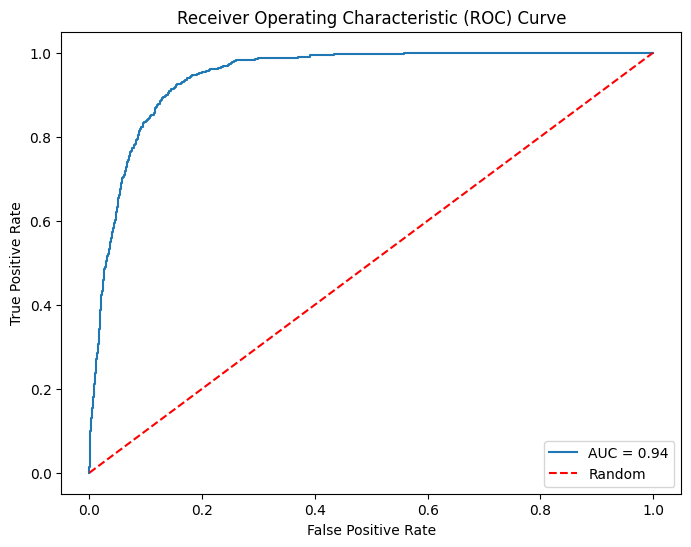

In [ ]:
# 予測値から確率に変換する関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# モデルの予測値を確率に変換
pred_probs = sigmoid(pred_y)
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ROC曲線とAUCの計算
fpr, tpr, thresholds = roc_curve(val_y, pred_probs)
auc = roc_auc_score(val_y, pred_probs)

# ROC曲線のプロット
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
print(auc)

0.9443746201278791


In [ ]:
#データ読み込み
df_test=pd.read_csv("/content/bank_test.csv")

In [ ]:
df_test = data_pre(df_test)

In [ ]:
predict = model.predict(df_test)
df_test["y"]=predict

In [ ]:
df_ID=df_test["id"]
df_test["id"]=df_ID.astype(int)

In [ ]:
df_test.to_csv("sample_submit.csv",columns=['id', 'y'],index = False,header = False)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

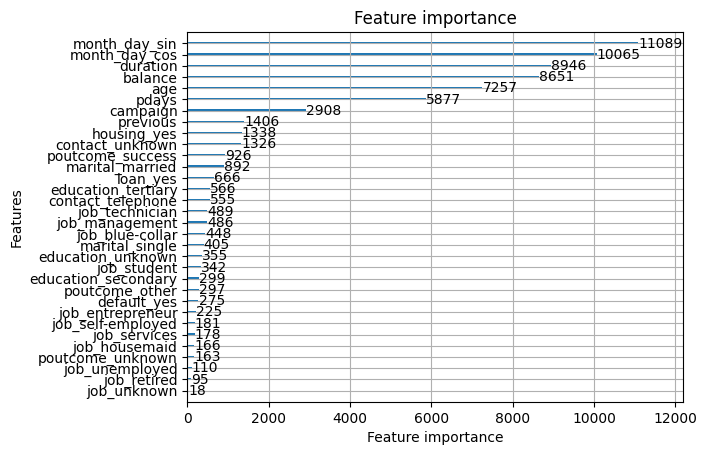

In [ ]:
lgb.plot_importance(model)

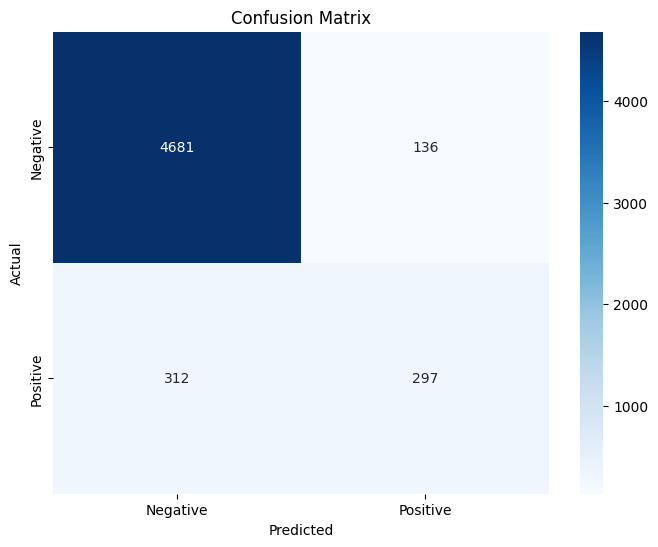

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
# 予測（確率）
predict_prob = model.predict(val_x)
# 予測（クラス）
threshold = 0.5
predict_class = (predict_prob >= threshold).astype(int)
# 混同行列
conf_matrix = confusion_matrix(val_y, predict_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
# 評価指標
accuracy = accuracy_score(val_y, predict_class)
precision = precision_score(val_y, predict_class)
recall = recall_score(val_y, predict_class)
f1 = f1_score(val_y, predict_class)
roc_auc = roc_auc_score(val_y, predict_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.92
Precision: 0.69
Recall: 0.49
F1 Score: 0.57
ROC AUC: 0.94
